In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from math import sqrt

import tensorflow as tf
#imports locais
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [2]:
df = pd.read_csv('bases/kernel_data_balanced.csv', header=None)

In [3]:
df.columns = ['AltCountLineCodes', 'CountInput', 'CountLineBlank', 
              'CountLineCodeDecl', 'CountLineComment', 
              'CountLinePreprocessor', 'CountPath', 'CountStmt', 
              'CountStmtEmpty', 'Cyclomatic', 'CyclomaticStrict', 
              'Knots', 'MinEssentialKnots', 'RatioCommentToCode', 
              'AltCountLineComment', 'CountLine', 'CountLineCode', 
              'CountLineCodeExe', 'CountLineInactive', 'CountOutput',
             'CountSemicolon', 'CountStmtDecl', 'CountStmtExe', 
             'CyclomaticModified', 'Essential', 'MaxEssentialKnots', 
             'MaxNesting', 'Affected', 'Fold']   

In [4]:
df = df.drop([0], axis=0)
df.head(10)

,AltCountLineCodes,CountInput,CountLineBlank,CountLineCodeDecl,CountLineComment,CountLinePreprocessor,CountPath,CountStmt,CountStmtEmpty,Cyclomatic,...,CountOutput,CountSemicolon,CountStmtDecl,CountStmtExe,CyclomaticModified,Essential,MaxEssentialKnots,MaxNesting,Affected,Fold
1,48,11,8,7,2,0,192,42,1,11,...,23,34,4,37,11,7,17,2,VULNERABLE,1
2,26,17,4,5,0,0,9,20,0,7,...,11,16,4,16,7,5,5,2,VULNERABLE,1
3,14,6,2,4,0,0,6,34,0,8,...,8,29,7,27,8,1,0,6,NEUTRAL,1
4,66,19,6,8,24,2,2952,73,2,27,...,20,55,6,65,27,1,0,6,VULNERABLE,1
5,299,23,32,22,110,8,21012545,200,2,45,...,43,156,15,183,44,25,38,9,VULNERABLE,1
6,19,11,2,1,5,0,3,11,0,3,...,6,9,0,11,3,1,0,2,NEUTRAL,1
7,26,16,6,2,0,0,1,15,0,1,...,22,15,0,15,1,1,0,0,VULNERABLE,1
8,26,13,4,4,1,0,3,18,0,3,...,16,16,2,16,3,1,0,1,NEUTRAL,1
9,20,6,2,13,1,0,3,10,0,3,...,2,8,4,6,3,3,3,2,NEUTRAL,1
10,23,7,4,5,0,0,7,18,0,6,...,9,14,3,15,6,1,0,3,NEUTRAL,1


In [5]:
df = df.drop(columns=["Affected"])
df_y = df["Fold"]
df = df.drop(columns=["Fold"])
df_x = df

In [6]:
df_x.head(10)

,AltCountLineCodes,CountInput,CountLineBlank,CountLineCodeDecl,CountLineComment,CountLinePreprocessor,CountPath,CountStmt,CountStmtEmpty,Cyclomatic,...,CountLineCodeExe,CountLineInactive,CountOutput,CountSemicolon,CountStmtDecl,CountStmtExe,CyclomaticModified,Essential,MaxEssentialKnots,MaxNesting
1,48,11,8,7,2,0,192,42,1,11,...,34,0,23,34,4,37,11,7,17,2
2,26,17,4,5,0,0,9,20,0,7,...,17,0,11,16,4,16,7,5,5,2
3,14,6,2,4,0,0,6,34,0,8,...,8,0,8,29,7,27,8,1,0,6
4,66,19,6,8,24,2,2952,73,2,27,...,50,1,20,55,6,65,27,1,0,6
5,299,23,32,22,110,8,21012545,200,2,45,...,221,27,43,156,15,183,44,25,38,9
6,19,11,2,1,5,0,3,11,0,3,...,14,0,6,9,0,11,3,1,0,2
7,26,16,6,2,0,0,1,15,0,1,...,22,0,22,15,0,15,1,1,0,0
8,26,13,4,4,1,0,3,18,0,3,...,21,0,16,16,2,16,3,1,0,1
9,20,6,2,13,1,0,3,10,0,3,...,12,0,2,8,4,6,3,3,3,2
10,23,7,4,5,0,0,7,18,0,6,...,14,0,9,14,3,15,6,1,0,3


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df_x.values, df_y.values, test_size=0.3, random_state=1)

TypeError: unhashable type: 'numpy.ndarray'

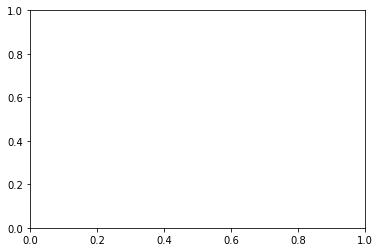

In [11]:
plt.plot(x_train, y_train, '*')